## *Real datasets and Keras - MNIST*

#### *Five weeks into #Deeplearning and all I feel is that fundamentally the world is all about combination and sequence of numbers!*
#### *#DataScience #UIC #BAO*

In [9]:
# Tensorflow trial
# 6.4.1.3 Linear Classifier  [reference: https://www.tensorflow.org/tutorials/mnist/pros/ ]

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

sess = tf.InteractiveSession()
# 28 by 28 = 784 pixel MNIST image | Num of observations or images is not yet declared
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

sess.run(tf.global_variables_initializer())

y = tf.matmul(x,W) + b
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, y_))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

for i in range(1000):
    batch = mnist.train.next_batch(100)
    train_step.run(feed_dict={x: batch[0], y_: batch[1]})

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
0.9202


In [14]:
#6.1. 4.1 Fetch data
import gzip
import numpy as np

def load_mnist_images(filename):
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1, 1, 28, 28)
    return data / np.float32(256)

def load_mnist_labels(filename):
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=8)
    return data

# We can now download and read the training and test set images and labels.
X = load_mnist_images('train-images-idx3-ubyte.gz')
y = load_mnist_labels('train-labels-idx1-ubyte.gz')
X_test = load_mnist_images('t10k-images-idx3-ubyte.gz')
y_test = load_mnist_labels('t10k-labels-idx1-ubyte.gz')


def reshape_array(a):
    num_pixels = a.shape[1] * a.shape[2]*a.shape[3]
    a = a.reshape(a.shape[0], num_pixels).astype('float32')
    a = a.reshape(a.shape[0], num_pixels).astype('float32')
    return a;

X = reshape_array(X)
X_test = reshape_array(X_test)

In [15]:
# 6.1. 4.2 Split data into 80:20
import pandas as pd
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def split_data(X,y,test_proportion):
    X_train, X_Val, y_train, y_Val = train_test_split(X, y, test_size=test_proportion, random_state=0)
    print(X_train.shape, y_train.shape)
    return X_train, X_Val, y_train, y_Val; 
#X_train, X_Val, y_train, y_Val = train_test_split(X, y, test_size=0.2, random_state=0)
#X_train.shape, y_train.shape

In [42]:
def logistic_loss(W, b, X, y):
    # evaluate class scores, [N x K]
    scores = np.dot(X, W) + b 
    scores = scores/scores.max()
  
    # compute the class probability
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]  # How do we deal if there is only one output 
    
    num_examples = len(X)
    #print(num_examples)
    #print(probs[range(num_examples),y])
    # compute the loss: average cross-entropy loss and regularization
    corect_logprobs = -np.log(probs[range(num_examples),y])
    #print("corect_logprobs shape : ",corect_logprobs.shape)
    #print(y)
    #print("corect_logprobs shape : ",corect_logprobs.shape)
    data_loss = np.sum(corect_logprobs)/num_examples
    #print("data_loss shape : ",data_loss.shape)
    
    return data_loss;
    
# 3.2. Write a function to compute the multiclass SVM loss given the parameters (W; b)
# of a linear model (as numpy arrays) and an example (x; y).

def multiClass_SVM_Loss(W, b, X, y):
    # evaluate class scores, [N x K]
    scores = np.dot(X, W) + b 
    correct_scores = scores[range(num_examples),y]
    
    loss = scores - correct_scores + np.ones[scores.shape]
    loss[loss<0] = 0
    loss[range(num_examples),y] = 0
    svm_loss = np.sum(loss)
    return svm_loss
    
    
# 3.3 Add an `1 regularization and an `2 regularization to the loss function.
# Can I add the regularization term separately ? 0.5*Lambda*W^2 and 0.5*Lambda*W

def logistic_loss_lasso(W,b,X,y,reg):
    data_loss = logistic_loss(W, b, X, y)
    reg_loss = 0.5*reg*np.sum(W)
    data_loss = data_loss + reg_loss
    return data_loss

def logistic_loss_ridge(W,b,X,y,reg):
    data_loss = logistic_loss(W, b, X, y)
    reg_loss = 0.5*reg*np.sum(W*W)
    data_loss = data_loss + reg_loss
    return data_loss

### *Linear Classifier Implementation*

In [41]:
# 6.1 4.3 Linear Classifier [Alternate Method]

def linear_classifier(X_train,y_train,W,b,reg,learning_rate,num_iter):
    #reg = 0.0001
    #learning_rate = 0.1
    
    for i in range(num_iter):
        scores = np.dot(X_train,W)+ b
        scores = scores/scores.max()
        
        exp_scores = np.exp(scores)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
    
        loss = logistic_loss_ridge(W,b,X_train,y_train,reg)
        #loss = logistic_loss(W,b,X_train,y_train)
        if i % 10 == 0:
            print("iteration:",i, " loss:",loss)
  
        num_examples = len(X_train)
        dscores = probs
        dscores[range(num_examples),y_train] -= 1
        dscores /= num_examples
  
        # backpropate the gradient to the parameters (W,b)
        dW = np.dot(X_train.T, dscores)
        db = np.sum(dscores, axis=0, keepdims=True)
  
        dW += reg*W # regularization gradient
  
        # perform a parameter update
        W += -learning_rate * dW
        b += -learning_rate * db
    return W,b,loss;


In [48]:
test_proportion = 0.2
X_train, X_Val, y_train, y_Val = split_data(X,y,test_proportion)

batch_size = 48
D = X_train.shape[1]     # 28*28
k = int(max(y_train)+ 1) # 10
W = 0.1*np.random.randn(D,k)   # How do you declare a D*K matrix ??? Be careful !!!
b = 0.1*np.zeros((1,k))
#print("### Entering batch execution")
#for i in range(0,batch_size):
#    start = int((48000/48)*i)
#    end = int((48000/48)*(i+1))
W,b,loss = linear_classifier(X_train,y_train,W,b,0.0001,0.1,200)    
    # Performance check
    
y_hat_train = np.argmax((np.dot(X_train, W)+b), axis = 1)
training_precision = np.mean(y_hat_train == y_train)

y_hat_test = np.argmax((np.dot(X_Val, W)+b), axis = 1)
test_precision = np.mean(y_hat_test == y_Val)
    
#print("batch: ",i, " | Loss: ",loss)
#print("### Exiting batch execution")
print("Accuracy train = ",training_precision," | test = ",test_precision)


(48000, 784) (48000,)
iteration: 0  loss: 2.37807669461
iteration: 10  loss: 2.13995445156
iteration: 20  loss: 2.09250093798
iteration: 30  loss: 2.07494470262
iteration: 40  loss: 2.06819067084
iteration: 50  loss: 2.06450998281
iteration: 60  loss: 2.06224910566
iteration: 70  loss: 2.06083999262
iteration: 80  loss: 2.05999824435
iteration: 90  loss: 2.05956536491
iteration: 100  loss: 2.05944587327
iteration: 110  loss: 2.06009461033
iteration: 120  loss: 2.06106551345
iteration: 130  loss: 2.06213309217
iteration: 140  loss: 2.06329377491
iteration: 150  loss: 2.06454529835
iteration: 160  loss: 2.06588618995
iteration: 170  loss: 2.06731546976
iteration: 180  loss: 2.06883247275
iteration: 190  loss: 2.07043673962
### Exiting batch execution
Accuracy train =  0.7455625  | test =  0.746333333333


In [54]:
# 6.1. 4.4 Cross validation justification 

from sklearn import cross_validation
cv = cross_validation.KFold(len(X_train), n_folds=5, shuffle=True) # 43200 & 4800 each
j = 0
for train_indices, test_indices in cv:
    # N-1 Folds
    X_train_temp = X_train[train_indices]
    y_train_temp = y_train[train_indices]
    # The remaining 1 fold
    X_test_temp = X_train[test_indices]
    y_test_temp = y_train[test_indices]
    
    print("#### CV ",j)
    j = j + 1
    batch_size = 48
    D = X_train_temp.shape[1]     # 28*28
    k = int(max(y_train_temp)+ 1) # 10
    W = 0.1*np.random.randn(D,k)   # How do you declare a D*K matrix ??? Be careful !!!
    b = 0.1*np.zeros((1,k))
    print("### Entering batch execution")
    #for i in range(0,batch_size):
    #    start = int((43200/48)*i)    # BE CAREFUL !!! Hard coded the value temporarily for n_folds = 10
    #    end = int((43200/48)*(i+1))  #
    W,b,loss = linear_classifier(X_train_temp,y_train_temp,W,b,0.0001,0.1,50)    
        # Performance check

    y_hat_train = np.argmax((np.dot(X_train_temp, W)+b), axis = 1)
    training_precision = np.mean(y_hat_train == y_train_temp)

    y_hat_test = np.argmax((np.dot(X_test_temp, W)+b), axis = 1)
    test_precision = np.mean(y_hat_test == y_test_temp)

        #print("batch: ",i, " | Loss: ",loss)
    print("### Exiting batch execution")
    print("Accuracy train = ",training_precision," | test = ",test_precision)


#### CV  0
### Entering batch execution
iteration: 0  loss: 2.33685417744
iteration: 10  loss: 2.14257548132
iteration: 20  loss: 2.0988612302
iteration: 30  loss: 2.08402149126
iteration: 40  loss: 2.0782314865
### Exiting batch execution
Accuracy train =  0.735703125  | test =  0.735625
#### CV  1
### Entering batch execution
iteration: 0  loss: 2.35475057241
iteration: 10  loss: 2.15512251505
iteration: 20  loss: 2.10321629781
iteration: 30  loss: 2.08356117154
iteration: 40  loss: 2.07322372247
### Exiting batch execution
Accuracy train =  0.722057291667  | test =  0.727291666667
#### CV  2
### Entering batch execution
iteration: 0  loss: 2.35071420078
iteration: 10  loss: 2.07772922618
iteration: 20  loss: 2.02132843078
iteration: 30  loss: 2.02381109523
iteration: 40  loss: 2.02940321456
### Exiting batch execution
Accuracy train =  0.737552083333  | test =  0.728645833333
#### CV  3
### Entering batch execution
iteration: 0  loss: 2.31977186322
iteration: 10  loss: 2.10121940647

In [40]:
def my_own_batch_sgd(X_train,y_train,reg,learning_rate,num_iter):
    batch_size = 48    
    D = X_train.shape[1]     # 28*28
    k = int(max(y_train)+ 1) # 10
    W = 0.1*np.random.randn(D,k)   # How do you declare a D*K matrix ??? Be careful !!!
    b = 0.1*np.zeros((1,k))
    #print("### Entering batch execution")
    #for i in range(0,batch_size):
    #    start = int((48000/48)*i)
    #    end = int((48000/48)*(i+1))
    #    W,b,loss = linear_classifier(X_train[start:end,],y_train[start:end,],W,b,reg,learning_rate,num_iter)    
    #    # Performance check
    W,b,loss = linear_classifier(X_train,y_train,W,b,reg,learning_rate,num_iter)
    #print("### Exiting batch execution")
    return W,b,loss;

(48000, 784) (48000,)
iteration: 0  loss: 2.33718895479
iteration: 0  loss: 2.32763674145
iteration: 10  loss: 2.09594868758
iteration: 20  loss: 2.07763685506
iteration: 30  loss: 2.07130263051
iteration: 40  loss: 2.06815296615
iteration: 50  loss: 2.06639209246
iteration: 60  loss: 2.06539496808
iteration: 70  loss: 2.06488370925
iteration: 80  loss: 2.06471511327
iteration: 90  loss: 2.06480758666
iteration: 100  loss: 2.06511110501
iteration: 110  loss: 2.06559323078
iteration: 120  loss: 2.06623197618
iteration: 130  loss: 2.06701188959
iteration: 140  loss: 2.06792178268
iteration: 150  loss: 2.06895334685
iteration: 160  loss: 2.07010027701
iteration: 170  loss: 2.07135769775
iteration: 180  loss: 2.07272177666
iteration: 190  loss: 2.07418945701
iteration: 200  loss: 2.07575826885


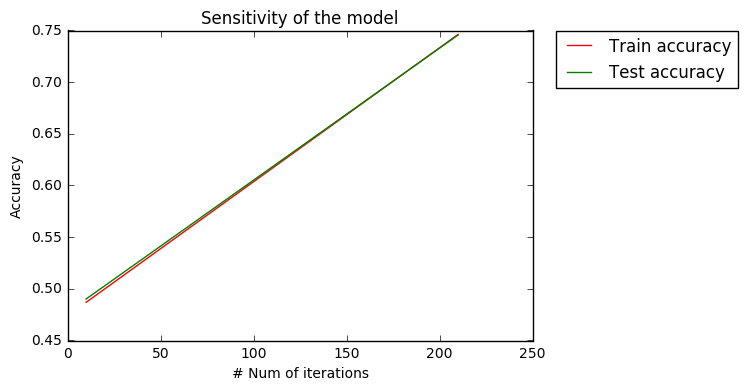

In [53]:
# 6.1. 4.5 Sensitivity of the model's performance to different number of gradient descent iterations !!

test_proportion = 0.2
X_train, X_test, y_train, y_test = split_data(X,y,test_proportion)
j = 0
train_acc = []
test_acc = []
x_axis = []
for i in range(1, 22,20):
    W,b,loss = my_own_batch_sgd(X_train,y_train,0.0001,0.1,i*10)
    #W,b,loss = linear_classifier(X_train,y_train,0.0001,0.1,i)
    # Performance check
    y_hat_train = np.argmax((np.dot(X_train, W)+b), axis = 1)
    training_precision = np.mean(y_hat_train == y_train)
    
    y_hat_test = np.argmax((np.dot(X_test, W)+b), axis = 1)
    test_precision = np.mean(y_hat_test == y_test)
    #print("# of Iterations = ",i," | Accuracy train = ",training_precision, " | Accuracy test = ",test_precision)
    
    x_axis.append(i*10)
    train_acc.append(training_precision)
    test_acc.append(test_precision)

plt.plot(x_axis,train_acc,'r',label = "Train accuracy") 
plt.plot(x_axis,test_acc,'g',label = "Test accuracy")
plt.xlabel("# Num of iterations")
plt.ylabel("Accuracy")
plt.title("Sensitivity of the model")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.text(100, max(train_acc[2])-max(train_acc[2]/10), 'Test accuracy' ,color = 'green')
#plt.text(100, max(train_acc[2])-max(train_acc[2]/8), 'Train accuracy' ,color = 'red')
plt.show()

iteration: 0  loss: 2.2915709705
iteration: 10  loss: 2.25713240319
iteration: 20  loss: 2.2204883675
iteration: 30  loss: 2.1875583749
iteration: 40  loss: 2.16156233441
iteration: 0  loss: 2.31217878279
iteration: 10  loss: 2.07239882972
iteration: 20  loss: 2.05606869689
iteration: 30  loss: 2.05228421662
iteration: 40  loss: 2.05233245775
iteration: 0  loss: 2.35650759873
iteration: 10  loss: 2.03958872161
iteration: 20  loss: 2.04354473542
iteration: 30  loss: 2.05146737007
iteration: 40  loss: 2.06276175034
iteration: 0  loss: 2.34859465448
iteration: 10  loss: 2.04366854404
iteration: 20  loss: 2.05251762756
iteration: 30  loss: 2.0702252679
iteration: 40  loss: 2.09518947665
iteration: 0  loss: 2.38198087239
iteration: 10  loss: 2.04768806169
iteration: 20  loss: 2.0650001888
iteration: 30  loss: 2.09606507543
iteration: 40  loss: 2.13997642178


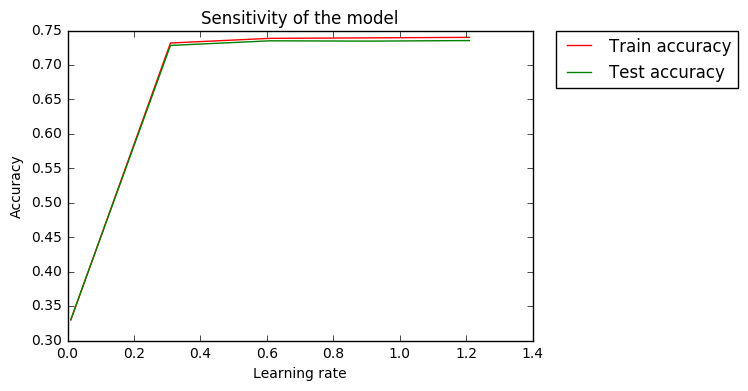

In [43]:
# 6.1. 4.5 sensitivity of the model's performance to different learning rates !!

j = 0
train_acc = []
test_acc = []
x_axis = []
for i in range(1, 151, 30):
    W,b,loss = my_own_batch_sgd(X_train,y_train,0.0001,i/100,50)
    # Performance check
    y_hat_train = np.argmax((np.dot(X_train, W)+b), axis = 1)
    training_precision = np.mean(y_hat_train == y_train)
    
    y_hat_test = np.argmax((np.dot(X_test, W)+b), axis = 1)
    test_precision = np.mean(y_hat_test == y_test)
    #print("# of Iterations = ",i," | Accuracy train = ",training_precision, " | Accuracy test = ",test_precision)
    
    x_axis.append(i/100)
    train_acc.append(training_precision)
    test_acc.append(test_precision)
    
plt.plot(x_axis,train_acc,'r',label = "Train accuracy") 
plt.plot(x_axis,test_acc,'g',label = "Test accuracy")
plt.xlabel("Learning rate")
plt.ylabel("Accuracy")
plt.title("Sensitivity of the model")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.text(100, max(train_acc[2])-max(train_acc[2]/10), 'Test accuracy' ,color = 'green')
#plt.text(100, max(train_acc[2])-max(train_acc[2]/8), 'Train accuracy' ,color = 'red')
plt.show()

iteration: 0  loss: 2.35168652305
iteration: 10  loss: 2.10879274561
iteration: 20  loss: 2.18603028359
iteration: 30  loss: 2.31982186497
iteration: 40  loss: 2.50639367571
iteration: 0  loss: 6.33134563022
iteration: 10  loss: 4.19322163946
iteration: 20  loss: 5.04284506603
iteration: 30  loss: 5.70774722423
iteration: 40  loss: 6.04869284295
iteration: 0  loss: 10.2819731336
iteration: 10  loss: 3.74756494176
iteration: 20  loss: 4.07073972647
iteration: 30  loss: 4.1685217912
iteration: 40  loss: 4.18689748503
iteration: 0  loss: 13.612548036
iteration: 10  loss: 3.34519623483
iteration: 20  loss: 3.46200431105
iteration: 30  loss: 3.47268088429
iteration: 40  loss: 3.47341452051
iteration: 0  loss: 18.0903832903
iteration: 10  loss: 3.08417264553
iteration: 20  loss: 3.11292848341
iteration: 30  loss: 3.11340462863
iteration: 40  loss: 3.11328154207


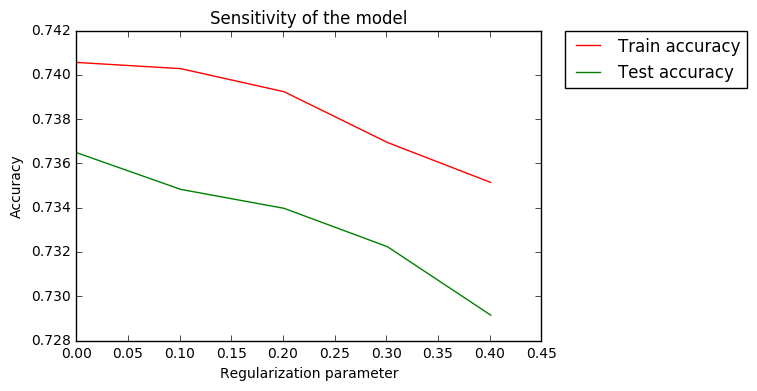

In [45]:
#6.1 4.6. What is the sensitivity of the model's performance to different regularization parameter values

j = 0
train_acc = []
test_acc = []
x_axis = []
for i in range(1, 501, 100):
    W,b,loss = my_own_batch_sgd(X_train,y_train,i/1000,0.8,50)
    #W,b,loss = linear_classifier(X_train,y_train,i/1000,1.7,1000)
    # Performance check
    y_hat_train = np.argmax((np.dot(X_train, W)+b), axis = 1)
    training_precision = np.mean(y_hat_train == y_train)
    
    y_hat_test = np.argmax((np.dot(X_test, W)+b), axis = 1)
    test_precision = np.mean(y_hat_test == y_test)
    #print("# of Iterations = ",i," | Accuracy train = ",training_precision, " | Accuracy test = ",test_precision)
    
    x_axis.append(i/1000)
    train_acc.append(training_precision)
    test_acc.append(test_precision)
    
plt.plot(x_axis,train_acc,'r',label = "Train accuracy") 
plt.plot(x_axis,test_acc,'g',label = "Test accuracy")
plt.xlabel("Regularization parameter")
plt.ylabel("Accuracy")
plt.title("Sensitivity of the model")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.text(100, max(train_acc[2])-max(train_acc[2]/10), 'Test accuracy' ,color = 'green')
#plt.text(100, max(train_acc[2])-max(train_acc[2]/8), 'Train accuracy' ,color = 'red')
plt.show()


iteration: 0  loss: 2.33812257755
iteration: 10  loss: 2.04744441337
iteration: 20  loss: 2.04057328236
iteration: 30  loss: 2.03821445431
iteration: 40  loss: 2.03702363093
iteration: 0  loss: 2.27230346794
iteration: 10  loss: 2.03870411095
iteration: 20  loss: 2.03599855974
iteration: 30  loss: 2.03512128046
iteration: 40  loss: 2.03468490675
iteration: 0  loss: 2.30228440488
iteration: 10  loss: 2.03636478596
iteration: 20  loss: 2.03386415242
iteration: 30  loss: 2.03357267129
iteration: 40  loss: 2.03346452551
iteration: 0  loss: 2.324401599
iteration: 10  loss: 2.0424667437
iteration: 20  loss: 2.038012729
iteration: 30  loss: 2.03650223514
iteration: 40  loss: 2.03573774922
iteration: 0  loss: 2.32454263032
iteration: 10  loss: 2.04178225413
iteration: 20  loss: 2.03755672081
iteration: 30  loss: 2.03618752801
iteration: 40  loss: 2.03551255052


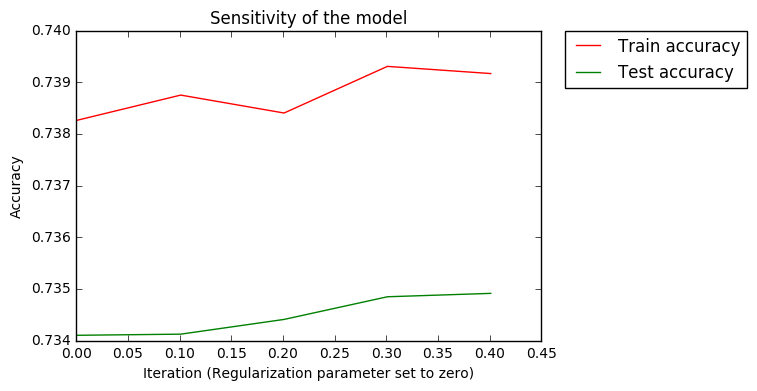

In [47]:
#6.1 4.6. What is the sensitivity of the model's performance to different regularization parameter values

j = 0
train_acc = []
test_acc = []
x_axis = []
for i in range(1, 501, 100):
    W,b,loss = my_own_batch_sgd(X_train,y_train,0,0.8,50)
    #W,b,loss = linear_classifier(X_train,y_train,i/1000,1.7,1000)
    # Performance check
    y_hat_train = np.argmax((np.dot(X_train, W)+b), axis = 1)
    training_precision = np.mean(y_hat_train == y_train)
    
    y_hat_test = np.argmax((np.dot(X_test, W)+b), axis = 1)
    test_precision = np.mean(y_hat_test == y_test)
    #print("# of Iterations = ",i," | Accuracy train = ",training_precision, " | Accuracy test = ",test_precision)
    
    x_axis.append(i/1000)
    train_acc.append(training_precision)
    test_acc.append(test_precision)
    
plt.plot(x_axis,train_acc,'r',label = "Train accuracy") 
plt.plot(x_axis,test_acc,'g',label = "Test accuracy")
plt.xlabel("Iteration (Regularization parameter set to zero)")
plt.ylabel("Accuracy")
plt.title("Sensitivity of the model")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.text(100, max(train_acc[2])-max(train_acc[2]/10), 'Test accuracy' ,color = 'green')
#plt.text(100, max(train_acc[2])-max(train_acc[2]/8), 'Train accuracy' ,color = 'red')
plt.show()


(59400, 784) (59400,)
### Entering batch execution
iteration: 0  loss: 2.70373796023
iteration: 10  loss: 1.47494325084
iteration: 20  loss: 0.678445508364
iteration: 30  loss: 0.587893341621
iteration: 40  loss: 0.407833540155
iteration: 0  loss: 0.614009448394
iteration: 10  loss: 0.545098894864
iteration: 20  loss: 0.354215235951
iteration: 30  loss: 0.317303245471
iteration: 40  loss: 0.294665719246
iteration: 0  loss: 0.559260317138
iteration: 10  loss: 0.513981050557
iteration: 20  loss: 0.76532590799
iteration: 30  loss: 0.42567859989
iteration: 40  loss: 0.648522183185
iteration: 0  loss: 0.522781126365
iteration: 10  loss: 0.441072569421
iteration: 20  loss: 0.399474320829
iteration: 30  loss: 0.298154868002
iteration: 40  loss: 0.275292772219
iteration: 0  loss: 0.474279939626
iteration: 10  loss: 0.507169752909
iteration: 20  loss: 0.438518911673
iteration: 30  loss: 0.291574945205
iteration: 40  loss: 0.27146415901
iteration: 0  loss: 0.431862104799
iteration: 10  loss: 0.3

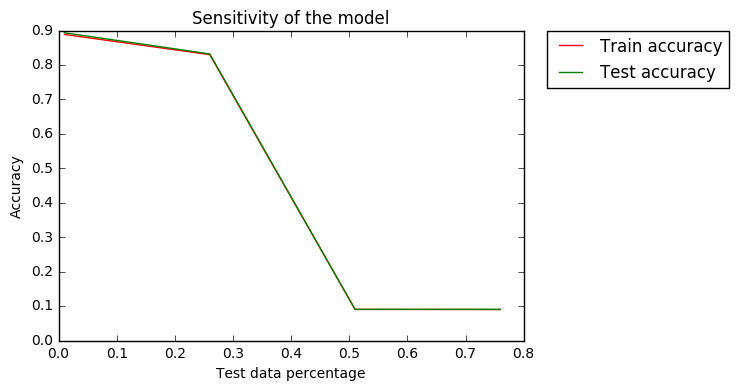

In [27]:
# 6.1.4.7 What is the sensitivity of the model's performance with respect to a different test-train split (50%:50%).
j = 0
train_acc = []
test_acc = []
x_axis = []
for i in range(1, 101, 25):
    X_train, X_test, y_train, y_test = split_data(X,y,i/100)
    
    W,b,loss = my_own_batch_sgd(X_train,y_train,0.002,1.7,50)
    #W,b,loss = linear_classifier(X_train,y_train,0.002,1.7,1000)
    # Performance check
    y_hat_train = np.argmax((np.dot(X_train, W)+b), axis = 1)
    training_precision = np.mean(y_hat_train == y_train)

    y_hat_test = np.argmax((np.dot(X_test, W)+b), axis = 1)
    test_precision = np.mean(y_hat_test == y_test)
    #print("# of Iterations = ",i," | Accuracy train = ",training_precision, " | Accuracy test = ",test_precision)
    x_axis.append(i/100)
    train_acc.append(training_precision)
    test_acc.append(test_precision)

plt.plot(x_axis,train_acc,'r',label = "Train accuracy") 
plt.plot(x_axis,test_acc,'g',label = "Test accuracy")
plt.xlabel("Test data percentage")
plt.ylabel("Accuracy")
plt.title("Sensitivity of the model")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.text(100, max(train_acc[2])-max(train_acc[2]/10), 'Test accuracy' ,color = 'green')
#plt.text(100, max(train_acc[2])-max(train_acc[2]/8), 'Train accuracy' ,color = 'red')
plt.show()

## *6.1. 5.1 Two-layer feedforward neural network ReLU activation*

In [56]:
def two_layer_ffnn(X_train,y_train,W1,b1,W2,b2,reg,learning_rate,iterate):
    
    #reg = 0.0001
    #learning_rate = 0.1
    for i in range(iterate):
        hidden_layer = np.maximum(0,np.dot(X_train,W1)+ b1)
        scores = np.dot(hidden_layer,W2)+ b2
        
        # compute the class probabilities
        exp_scores = np.exp(scores)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
        # compute the loss: average cross-entropy loss and regularization
        loss = logistic_loss(W2,b2,hidden_layer,y_train) + 0.5*reg*np.sum(W1*W1) + 0.5*reg*np.sum(W2*W2)
        #if i % 100 == 0:
            #print("iteration: ", i, " loss = ",loss)
        num_examples = len(X_train)
        dscores = probs
        dscores[range(num_examples),y_train] -= 1
        dscores /= num_examples
        # backpropate the gradient to the parameters (W,b)
        dW2 = np.dot(hidden_layer.T, dscores)         # is W equal to 'a' ref Week0 slides >>> dh/da * dg/dh
        db2 = np.sum(dscores, axis=0, keepdims=True)  
        dhidden = np.dot(dscores, W2.T)
        dhidden[hidden_layer <= 0] = 0
        dW1 = np.dot(X_train.T, dhidden)
        db1 = np.sum(dhidden, axis=0, keepdims=True)
        dW2 += reg * W2
        dW1 += reg * W1
        # perform a parameter update
        W1 += -learning_rate * dW1
        b1 += -learning_rate * db1
        W2 += -learning_rate * dW2
        b2 += -learning_rate * db2
    return W1, b1, W2, b2, loss;

In [57]:
def my_own_batch_sgd_ffn(X_train,y_train,reg,learning_rate,num_iter):
    hid_lyr_neurons = 32
    D = X_train.shape[1]
    k = int(max(y_train)+ 1)
    W1 = 0.01*np.random.randn(D,hid_lyr_neurons)   
    b1 = np.zeros((1,hid_lyr_neurons))
    W2 = 0.01*np.random.randn(hid_lyr_neurons,k)   
    b2 = np.zeros((1,k))
    batch_size = 48
    print("### Entering batch execution")
    for i in range(0,batch_size):
        #print("batch: ",i)
        start = int((X_train.shape[0]/48)*i)
        end = int((X_train.shape[0]/48)*(i+1))
        W1, b1, W2, b2, loss = two_layer_ffnn(X_train[start:end,],y_train[start:end,],W1,b1,W2,b2,reg,learning_rate,num_iter)
    print("### Exiting batch execution  |  Loss =", loss)
    return W1, b1, W2, b2, loss;

In [60]:
# 6.1.  5.1.1

test_proportion = 0.2
X_train, X_Val, y_train, y_Val = split_data(X,y,test_proportion)

W1, b1, W2, b2, loss = my_own_batch_sgd_ffn(X_train,y_train,0.01,0.1,50)

get_train_accuracy_ffn(X_train,y_train,W1, b1, W2, b2)
get_test_accuracy_ffn(X_Val,y_Val, W1, b1, W2, b2)

(48000, 784) (48000,)
### Entering batch execution
### Exiting batch execution  |  Loss = 2.12766417544
Accuracy Train :  0.917708333333
Accuracy Test  :  0.919666666667


0.91966666666666663

In [58]:
# 6.1. Cross validation justification 

from sklearn import cross_validation
cv = cross_validation.KFold(len(X_train), n_folds=5, shuffle=True) # 38400 & 9600 each
i = 0
for train_indices, test_indices in cv:
    i = i + 1  
    W1, b1, W2, b2, loss = my_own_batch_sgd_ffn(X_train[train_indices],y_train[train_indices],0.01,0.1,50)
    y_hat_test = np.argmax(np.dot(np.maximum(0,np.dot(X_train[test_indices],W1)+ b1),W2)+ b2, axis = 1)
    test_precision = np.mean(y_hat_test == y_train[test_indices])
    print("#### CV ", i, "Test Accuracy = ",test_precision)
    

### Entering batch execution
### Exiting batch execution  |  Loss = 2.12689888521
#### CV  1 Test Accuracy =  0.916458333333
### Entering batch execution
### Exiting batch execution  |  Loss = 2.11662944255
#### CV  2 Test Accuracy =  0.913333333333
### Entering batch execution
### Exiting batch execution  |  Loss = 2.1265063975
#### CV  3 Test Accuracy =  0.91125
### Entering batch execution
### Exiting batch execution  |  Loss = 2.14033840435
#### CV  4 Test Accuracy =  0.907083333333
### Entering batch execution
### Exiting batch execution  |  Loss = 2.13659797928
#### CV  5 Test Accuracy =  0.906041666667


In [82]:
# What is the sensitivity of the model's performance to different learning rates
# the number of gradient descent iterations. Describe via suitable plots.

test_proportion = 0.2
X_train, X_test, y_train, y_test = split_data(X,y,test_proportion)
j = 0
train_acc = []
test_acc = []
for i in range(10, 500, 100):
    W1, b1, W2, b2, loss = my_own_batch_sgd_ffn(X_train,y_train,0.01,0.1,i)
    
    # Performance check
    training_precision= get_train_accuracy_ffn(X_train,y_train,W1,b1,W2,b2)
    test_precision= get_test_accuracy_ffn(X_test,y_test,W1,b1,W2,b2)
    
    train_acc.append(training_precision)
    test_acc.append(test_precision)


(48000, 784) (48000,)
### Entering batch execution
### Exiting batch execution  |  Loss = 2.3204951546
Accuracy Train :  0.267020833333
Accuracy Test  :  0.270333333333
### Entering batch execution
### Exiting batch execution  |  Loss = 1.47831334999
Accuracy Train :  0.8340625
Accuracy Test  :  0.8365
### Entering batch execution
### Exiting batch execution  |  Loss = 1.45990054169
Accuracy Train :  0.843
Accuracy Test  :  0.848083333333
### Entering batch execution
### Exiting batch execution  |  Loss = 1.44953114347
Accuracy Train :  0.844604166667
Accuracy Test  :  0.849666666667
### Entering batch execution
### Exiting batch execution  |  Loss = 1.44234338196
Accuracy Train :  0.843833333333
Accuracy Test  :  0.848083333333


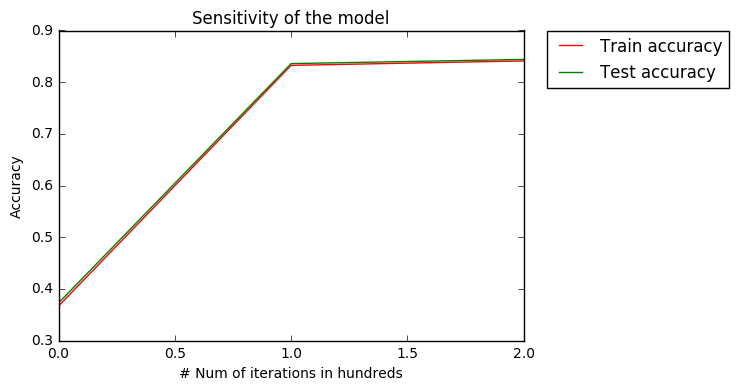

In [55]:
plt.plot(np.arange(0, len(train_acc)),train_acc,'r',label = "Train accuracy") 
plt.plot(np.arange(0, len(train_acc)),test_acc,'g',label = "Test accuracy")
plt.xlabel("# Num of iterations in hundreds")
plt.ylabel("Accuracy")
plt.title("Sensitivity of the model")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.text(100, max(train_acc[2])-max(train_acc[2]/10), 'Test accuracy' ,color = 'green')
#plt.text(100, max(train_acc[2])-max(train_acc[2]/8), 'Train accuracy' ,color = 'red')
plt.show()

In [70]:
j = 0
train_acc = []
test_acc = []
for i in range(1, 4000, 1000):
    W1, b1, W2, b2, loss = my_own_batch_sgd_ffn(X_train,y_train,0.01,i/1000,100)
    # Performance check
    # Performance check
    training_precision= get_train_accuracy_ffn(X_train,y_train,W1,b1,W2,b2)
    test_precision= get_test_accuracy_ffn(X_test,y_test,W1,b1,W2,b2)
    
    train_acc.append(training_precision)
    test_acc.append(test_precision)
    

batch:  0
iteration:  0  loss =  2.30397638125
batch:  1
iteration:  0  loss =  2.29831506135
batch:  2
iteration:  0  loss =  2.29075108259
batch:  3
iteration:  0  loss =  2.28408355022
batch:  4
iteration:  0  loss =  2.24461374647
batch:  5
iteration:  0  loss =  2.18649444426
batch:  6
iteration:  0  loss =  2.04013665403
batch:  7
iteration:  0  loss =  1.89737809829
batch:  8
iteration:  0  loss =  1.64922154103
batch:  9
iteration:  0  loss =  1.42168588874
batch:  10
iteration:  0  loss =  1.21120369167
batch:  11
iteration:  0  loss =  1.023928917
batch:  12
iteration:  0  loss =  1.01422760034
batch:  13
iteration:  0  loss =  0.898526274105
batch:  14
iteration:  0  loss =  0.895196972334
batch:  15
iteration:  0  loss =  0.771880610336
batch:  16
iteration:  0  loss =  0.780576304849
batch:  17
iteration:  0  loss =  0.676919494313
batch:  18
iteration:  0  loss =  0.665963946862
batch:  19
iteration:  0  loss =  0.647183988221
batch:  20
iteration:  0  loss =  0.653913948

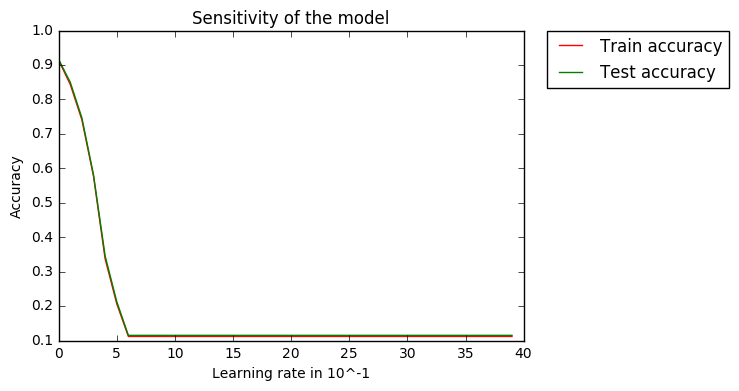

In [51]:
plt.plot(np.arange(0, len(train_acc)),train_acc,'r',label = "Train accuracy") 
plt.plot(np.arange(0, len(train_acc)),test_acc,'g',label = "Test accuracy")
plt.xlabel("Learning rate")
plt.ylabel("Accuracy")
plt.title("Sensitivity of the model")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.text(100, max(train_acc[2])-max(train_acc[2]/10), 'Test accuracy' ,color = 'green')
#plt.text(100, max(train_acc[2])-max(train_acc[2]/8), 'Train accuracy' ,color = 'red')
plt.show()

In [57]:
j = 0
train_acc = []
test_acc = []
for i in range(1, 4000, 1000):
    W1, b1, W2, b2, loss = my_own_batch_sgd_ffn(X_train,y_train,i/1000,0.01,200)
    # Performance check
    # Performance check
    # Performance check
    training_precision= get_train_accuracy_ffn(X_train,y_train,W1,b1,W2,b2)
    test_precision= get_test_accuracy_ffn(X_test,y_test,W1,b1,W2,b2)
    
    train_acc.append(training_precision)
    test_acc.append(test_precision)
    

batch:  0
iteration:  0  loss =  2.31526279623
iteration:  100  loss =  2.31478222946
batch:  1
iteration:  0  loss =  2.31473271727
iteration:  100  loss =  2.31426013937
batch:  2
iteration:  0  loss =  2.31399164314
iteration:  100  loss =  2.31352649135
batch:  3
iteration:  0  loss =  2.31306084348
iteration:  100  loss =  2.31249343479
batch:  4
iteration:  0  loss =  2.31227037393
iteration:  100  loss =  2.31175835308
batch:  5
iteration:  0  loss =  2.31149062367
iteration:  100  loss =  2.31094341475
batch:  6
iteration:  0  loss =  2.31087983803
iteration:  100  loss =  2.3102479676
batch:  7
iteration:  0  loss =  2.30974341771
iteration:  100  loss =  2.30910595677
batch:  8
iteration:  0  loss =  2.30863686638
iteration:  100  loss =  2.30793333056
batch:  9
iteration:  0  loss =  2.30749718853
iteration:  100  loss =  2.30670968817
batch:  10
iteration:  0  loss =  2.30627083793
iteration:  100  loss =  2.30532796492
batch:  11
iteration:  0  loss =  2.30439662191
iterat

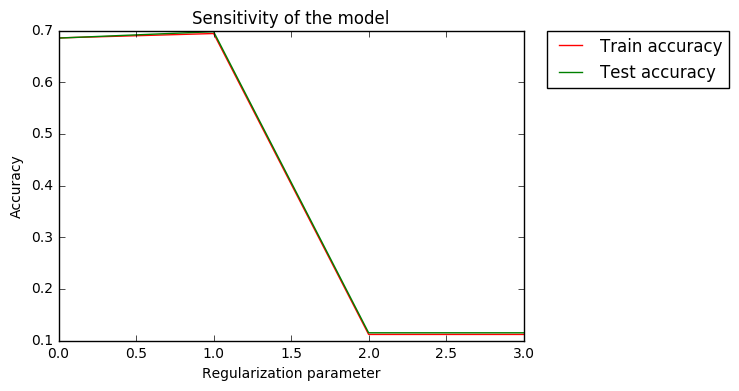

In [58]:
plt.plot(np.arange(0, len(train_acc)),train_acc,'r',label = "Train accuracy") 
plt.plot(np.arange(0, len(train_acc)),test_acc,'g',label = "Test accuracy")
plt.xlabel("Regularization parameter")
plt.ylabel("Accuracy")
plt.title("Sensitivity of the model")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.text(100, max(train_acc[2])-max(train_acc[2]/10), 'Test accuracy' ,color = 'green')
#plt.text(100, max(train_acc[2])-max(train_acc[2]/8), 'Train accuracy' ,color = 'red')
plt.show()

### Entering batch execution
### Exiting batch execution  |  Loss = 1.93164388347
Accuracy Train :  0.915625
Accuracy Test  :  0.916833333333
### Entering batch execution
### Exiting batch execution  |  Loss = 1.93443599537
Accuracy Train :  0.9138125
Accuracy Test  :  0.915916666667
### Entering batch execution
### Exiting batch execution  |  Loss = 1.94558736823
Accuracy Train :  0.913833333333
Accuracy Test  :  0.915416666667
### Entering batch execution
### Exiting batch execution  |  Loss = 1.9356365053
Accuracy Train :  0.914291666667
Accuracy Test  :  0.915


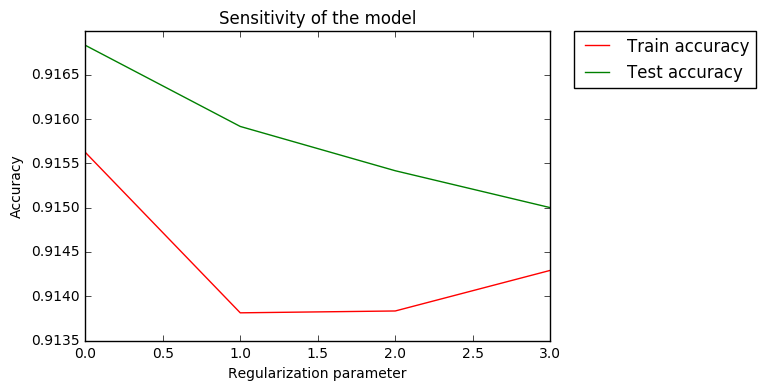

In [59]:
j = 0
train_acc = []
test_acc = []
for i in range(1, 4000, 1000):
    W1, b1, W2, b2, loss = my_own_batch_sgd_ffn(X_train,y_train,0,0.01,200)
    # Performance check
    # Performance check
    # Performance check
    training_precision= get_train_accuracy_ffn(X_train,y_train,W1,b1,W2,b2)
    test_precision= get_test_accuracy_ffn(X_test,y_test,W1,b1,W2,b2)
    
    train_acc.append(training_precision)
    test_acc.append(test_precision)

plt.plot(np.arange(0, len(train_acc)),train_acc,'r',label = "Train accuracy") 
plt.plot(np.arange(0, len(train_acc)),test_acc,'g',label = "Test accuracy")
plt.xlabel("Regularization parameter")
plt.ylabel("Accuracy")
plt.title("Sensitivity of the model")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.text(100, max(train_acc[2])-max(train_acc[2]/10), 'Test accuracy' ,color = 'green')
#plt.text(100, max(train_acc[2])-max(train_acc[2]/8), 'Train accuracy' ,color = 'red')
plt.show()

(48000, 784) (48000,)
### Entering batch execution
### Exiting batch execution  |  Loss = 2.13389287234
Accuracy Train :  0.915083333333
Accuracy Test  :  0.91675
(30000, 784) (30000,)
### Entering batch execution
### Exiting batch execution  |  Loss = 2.13258401663
Accuracy Train :  0.915333333333
Accuracy Test  :  0.9106


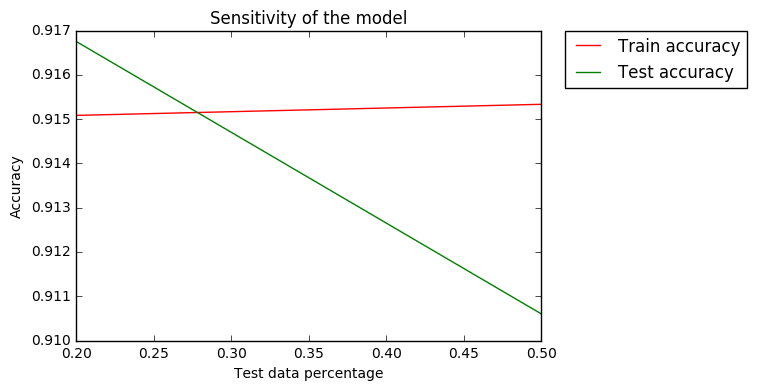

In [82]:
# 6.1.4.7 What is the sensitivity of the model's performance with respect to a different test-train split (50%:50%).
j = 0
train_acc = []
test_acc = []
x_axis = []
for i in range(20, 51, 30):
    X_train, X_test, y_train, y_test = split_data(X,y,i/100)
    
    W1, b1, W2, b2, loss = my_own_batch_sgd_ffn(X_train,y_train,0.01,0.1,50)
    #W,b,loss = linear_classifier(X_train,y_train,0.002,1.7,1000)
    # Performance check
    training_precision= get_train_accuracy_ffn(X_train,y_train,W1,b1,W2,b2)
    test_precision= get_test_accuracy_ffn(X_test,y_test,W1,b1,W2,b2)
    
    #print("# of Iterations = ",i," | Accuracy train = ",training_precision, " | Accuracy test = ",test_precision)
    x_axis.append(i/100)
    train_acc.append(training_precision)
    test_acc.append(test_precision)

plt.plot(x_axis,train_acc,'r',label = "Train accuracy") 
plt.plot(x_axis,test_acc,'g',label = "Test accuracy")
plt.xlabel("Test data percentage")
plt.ylabel("Accuracy")
plt.title("Sensitivity of the model")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.text(100, max(train_acc[2])-max(train_acc[2]/10), 'Test accuracy' ,color = 'green')
#plt.text(100, max(train_acc[2])-max(train_acc[2]/8), 'Train accuracy' ,color = 'red')
plt.show()

## *Leaky ReLU*

In [ ]:
# 6.1.5.2
def two_layer_ffnn_leaky_relu(X_train,y_train,W1,b1,W2,b2,reg,learning_rate,iterate):

    #reg = 0.0001
    #learning_rate = 0.1
    for i in range(iterate):
                
        hidden_layer = np.dot(X_train,W1)+b1
        hidden_layer[hidden_layer<0] = 0.01*hidden_layer[np.where(hidden_layer<0)]
        
        scores = np.dot(hidden_layer,W2)+ b2
        
        # compute the class probabilities
        exp_scores = np.exp(scores)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
        # compute the loss: average cross-entropy loss and regularization
        loss = logistic_loss(W2,b2,hidden_layer,y_train) + 0.5*reg*np.sum(W1*W1) + 0.5*reg*np.sum(W2*W2)
        #if i % 10 == 0:
            #print("iteration: ", i, " loss = ",loss)
        num_examples = len(X_train)
        dscores = probs
        dscores[range(num_examples),y_train] -= 1
        dscores /= num_examples
        # backpropate the gradient to the parameters (W,b)
        dW2 = np.dot(hidden_layer.T, dscores)         # is W equal to 'a' ref Week0 slides >>> dh/da * dg/dh
        db2 = np.sum(dscores, axis=0, keepdims=True)  
        dhidden = np.dot(dscores, W2.T)
        dhidden[hidden_layer < 0] = 0.01*dhidden[np.where(hidden_layer<0)]  # Doubt ???
        dW1 = np.dot(X_train.T, dhidden)
        db1 = np.sum(dhidden, axis=0, keepdims=True)
        dW2 += reg * W2
        dW1 += reg * W1
        # perform a parameter update
        W1 += -learning_rate * dW1
        b1 += -learning_rate * db1
        W2 += -learning_rate * dW2
        b2 += -learning_rate * db2
    return W1, b1, W2, b2, loss;

In [ ]:
def my_own_batch_sgd_ffn_leaky(X_train,y_train,reg,learning_rate,num_iter):
    hid_lyr_neurons = 32
    D = X_train.shape[1]
    k = int(max(y_train)+ 1)
    W1 = 0.01*np.random.randn(D,hid_lyr_neurons)   
    b1 = np.zeros((1,hid_lyr_neurons))
    W2 = 0.01*np.random.randn(hid_lyr_neurons,k)   
    b2 = np.zeros((1,k))
    batch_size = 48
    print("### Entering batch execution")
    for i in range(0,batch_size):
        #print("batch: ",i)
        start = int((X_train.shape[0]/48)*i)
        end = int((X_train.shape[0]/48)*(i+1))
        W1, b1, W2, b2, loss = two_layer_ffnn_leaky_relu(X_train[start:end,],y_train[start:end,],W1,b1,W2,b2,reg,learning_rate,num_iter)
    print("### Exiting batch execution  |  Loss =", loss)
    return W1, b1, W2, b2, loss;

In [123]:
test_proportion = 0.2
X_train, X_Val, y_train, y_Val = split_data(X,y,test_proportion)

W1, b1, W2, b2, loss = my_own_batch_sgd_ffn_leaky(X_train,y_train,0.01,0.2,50)

get_train_accuracy_ffn_leaky(X_train,y_train,W1, b1, W2, b2)
get_test_accuracy_ffn_leaky(X_Val,y_Val, W1, b1, W2, b2)

(48000, 784) (48000,)
### Entering batch execution
iteration:  0  loss =  2.31504785949
iteration:  10  loss =  2.30328859299
iteration:  20  loss =  2.26021032155
iteration:  30  loss =  2.10973968578
iteration:  40  loss =  1.81225432346
iteration:  0  loss =  1.48339687604
iteration:  10  loss =  1.16496237659
iteration:  20  loss =  0.97164211113
iteration:  30  loss =  0.849247722237
iteration:  40  loss =  0.767940074623
iteration:  0  loss =  0.75096851433
iteration:  10  loss =  0.685088484793
iteration:  20  loss =  0.641857595478
iteration:  30  loss =  0.608834461577
iteration:  40  loss =  0.58262113937
iteration:  0  loss =  0.642523529078
iteration:  10  loss =  0.59864574071
iteration:  20  loss =  0.572849329269
iteration:  30  loss =  0.553256152295
iteration:  40  loss =  0.537343917647
iteration:  0  loss =  0.632399021641
iteration:  10  loss =  0.592193231628
iteration:  20  loss =  0.567398472814
iteration:  30  loss =  0.54891765938
iteration:  40  loss =  0.5340

0.91858333333333331

In [67]:
from sklearn import cross_validation
cv = cross_validation.KFold(len(X_train), n_folds=5, shuffle=True) # 43200 & 4800 each
i = 0
for train_indices, test_indices in cv:
    i = i + 1  
    W1, b1, W2, b2, loss = my_own_batch_sgd_ffn_leaky(X_train[train_indices],y_train[train_indices],0.01,0.1,50)
    hidden_layer = np.dot(X_train[test_indices],W1)+b1
    hidden_layer[hidden_layer<0] = 0.01*hidden_layer[np.where(hidden_layer<0)]
    y_hat_test = np.argmax(np.dot(hidden_layer,W2)+ b2, axis = 1)
    test_precision = np.mean(y_hat_test == y_train[test_indices])
    print("#### CV ", i, " | Accuracy = ",test_precision)
    

### Entering batch execution
### Exiting batch execution  |  Loss = 2.11927216434
#### CV  1  | Accuracy =  0.915208333333
### Entering batch execution
### Exiting batch execution  |  Loss = 2.12870401467
#### CV  2  | Accuracy =  0.909270833333
### Entering batch execution
### Exiting batch execution  |  Loss = 2.1340257685
#### CV  3  | Accuracy =  0.9059375
### Entering batch execution
### Exiting batch execution  |  Loss = 2.12885540936
#### CV  4  | Accuracy =  0.912083333333
### Entering batch execution
### Exiting batch execution  |  Loss = 2.13127041973
#### CV  5  | Accuracy =  0.909791666667


In [124]:
# What is the sensitivity of the model's performance to different learning rates
# the number of gradient descent iterations. Describe via suitable plots.

test_proportion = 0.2
X_train, X_test, y_train, y_test = split_data(X,y,test_proportion)
j = 0
train_acc = []
test_acc = []
for i in range(10, 500, 100):
    W1, b1, W2, b2, loss = my_own_batch_sgd_ffn_leaky(X_train,y_train,0.01,0.1,i)
    
    # Performance check
    training_precision= get_train_accuracy_ffn_leaky(X_train,y_train,W1,b1,W2,b2)
    test_precision= get_test_accuracy_ffn_leaky(X_test,y_test,W1,b1,W2,b2)
    
    train_acc.append(training_precision)
    test_acc.append(test_precision)

(48000, 784) (48000,)
### Entering batch execution
iteration:  0  loss =  2.31572453191
iteration:  0  loss =  2.3125636681
iteration:  0  loss =  2.30746445329
iteration:  0  loss =  2.29593750092
iteration:  0  loss =  2.27422240446
iteration:  0  loss =  2.22562088065
iteration:  0  loss =  2.14412046026
iteration:  0  loss =  2.01904882155
iteration:  0  loss =  1.8510900304
iteration:  0  loss =  1.6517315526
iteration:  0  loss =  1.42581467457
iteration:  0  loss =  1.24253760147
iteration:  0  loss =  1.12725055091
iteration:  0  loss =  0.980298848696
iteration:  0  loss =  0.915114664523
iteration:  0  loss =  0.868450299828
iteration:  0  loss =  0.84573921269
iteration:  0  loss =  0.770547605926
iteration:  0  loss =  0.775411601296
iteration:  0  loss =  0.697556738966
iteration:  0  loss =  0.76629376832
iteration:  0  loss =  0.694218681914
iteration:  0  loss =  0.723315201722
iteration:  0  loss =  0.67505170901
iteration:  0  loss =  0.675360072696
iteration:  0  los

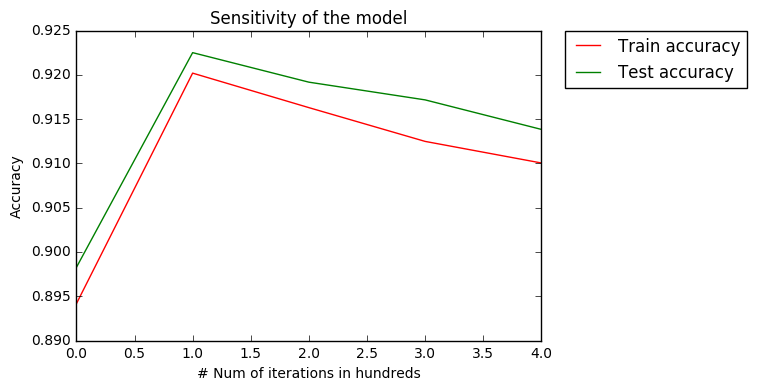

In [125]:
plt.plot(np.arange(0, len(train_acc)),train_acc,'r',label = "Train accuracy") 
plt.plot(np.arange(0, len(train_acc)),test_acc,'g',label = "Test accuracy")
plt.xlabel("# Num of iterations in hundreds")
plt.ylabel("Accuracy")
plt.title("Sensitivity of the model")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.text(100, max(train_acc[2])-max(train_acc[2]/10), 'Test accuracy' ,color = 'green')
#plt.text(100, max(train_acc[2])-max(train_acc[2]/8), 'Train accuracy' ,color = 'red')
plt.show()

In [126]:
j = 0
train_acc = []
test_acc = []
for i in range(1, 4000, 1000):
    W1, b1, W2, b2, loss = my_own_batch_sgd_ffn_leaky(X_train,y_train,0.01,i/1000,100)
    # Performance check
    # Performance check
    training_precision= get_train_accuracy_ffn_leaky(X_train,y_train,W1,b1,W2,b2)
    test_precision= get_test_accuracy_ffn_leaky(X_test,y_test,W1,b1,W2,b2)
    
    train_acc.append(training_precision)
    test_acc.append(test_precision)
    

### Entering batch execution
iteration:  0  loss =  2.31514817809
iteration:  10  loss =  2.31510257954
iteration:  20  loss =  2.31505701919
iteration:  30  loss =  2.31501150942
iteration:  40  loss =  2.3149660002
iteration:  50  loss =  2.31492052468
iteration:  60  loss =  2.31487506431
iteration:  70  loss =  2.31482958623
iteration:  80  loss =  2.31478410598
iteration:  90  loss =  2.31473857756
iteration:  0  loss =  2.31469091269
iteration:  10  loss =  2.31464312584
iteration:  20  loss =  2.31459531789
iteration:  30  loss =  2.31454746974
iteration:  40  loss =  2.31449956548
iteration:  50  loss =  2.31445160521
iteration:  60  loss =  2.31440360484
iteration:  70  loss =  2.31435563154
iteration:  80  loss =  2.31430765073
iteration:  90  loss =  2.31425961667
iteration:  0  loss =  2.31443125299
iteration:  10  loss =  2.31438771475
iteration:  20  loss =  2.31434414723
iteration:  30  loss =  2.31430057658
iteration:  40  loss =  2.31425690989
iteration:  50  loss =  2

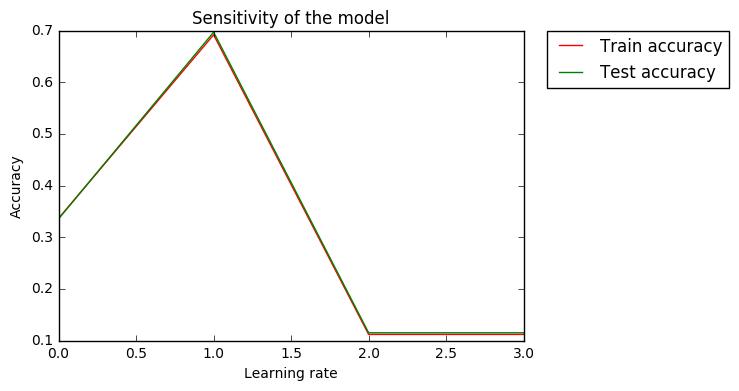

In [127]:
plt.plot(np.arange(0, len(train_acc)),train_acc,'r',label = "Train accuracy") 
plt.plot(np.arange(0, len(train_acc)),test_acc,'g',label = "Test accuracy")
plt.xlabel("Learning rate")
plt.ylabel("Accuracy")
plt.title("Sensitivity of the model")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.text(100, max(train_acc[2])-max(train_acc[2]/10), 'Test accuracy' ,color = 'green')
#plt.text(100, max(train_acc[2])-max(train_acc[2]/8), 'Train accuracy' ,color = 'red')
plt.show()

In [87]:
j = 0
train_acc = []
test_acc = []
x_axis = []
for i in range(1, 501, 100):
    W1, b1, W2, b2, loss = my_own_batch_sgd_ffn_leaky(X_train,y_train,i/1000,0.01,50)
    # Performance check
    training_precision= get_train_accuracy_ffn_leaky(X_train,y_train,W1,b1,W2,b2)
    test_precision= get_test_accuracy_ffn_leaky(X_test,y_test,W1,b1,W2,b2)
    
    x_axis.append(i/1000)
    train_acc.append(training_precision)
    test_acc.append(test_precision)
    

### Entering batch execution
### Exiting batch execution  |  Loss = 1.95751827154
Accuracy Train :  0.861066666667
Accuracy Train :  0.8661
### Entering batch execution
### Exiting batch execution  |  Loss = 2.5149372945
Accuracy Train :  0.790033333333
Accuracy Train :  0.7908
### Entering batch execution
### Exiting batch execution  |  Loss = 2.53288010204
Accuracy Train :  0.6285
Accuracy Train :  0.6307
### Entering batch execution
### Exiting batch execution  |  Loss = 2.3858515035
Accuracy Train :  0.399666666667
Accuracy Train :  0.400966666667
### Entering batch execution
### Exiting batch execution  |  Loss = 2.28791436214
Accuracy Train :  0.211033333333
Accuracy Train :  0.213233333333


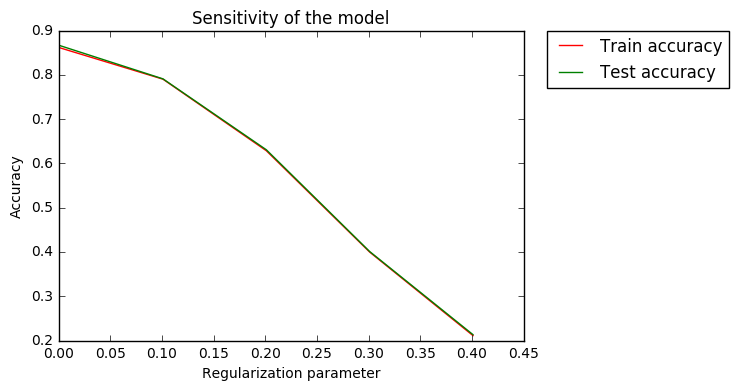

In [88]:
plt.plot(x_axis,train_acc,'r',label = "Train accuracy") 
plt.plot(x_axis,test_acc,'g',label = "Test accuracy")
plt.xlabel("Regularization parameter")
plt.ylabel("Accuracy")
plt.title("Sensitivity of the model")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.text(100, max(train_acc[2])-max(train_acc[2]/10), 'Test accuracy' ,color = 'green')
#plt.text(100, max(train_acc[2])-max(train_acc[2]/8), 'Train accuracy' ,color = 'red')
plt.show()

### Entering batch execution
### Exiting batch execution  |  Loss = 1.94764497465
Accuracy Train :  0.864433333333
Accuracy Train :  0.867466666667
### Entering batch execution
### Exiting batch execution  |  Loss = 1.94428396603
Accuracy Train :  0.867933333333
Accuracy Train :  0.8716
### Entering batch execution
### Exiting batch execution  |  Loss = 1.95023744061
Accuracy Train :  0.862433333333
Accuracy Train :  0.8655
### Entering batch execution
### Exiting batch execution  |  Loss = 1.95173863827
Accuracy Train :  0.860833333333
Accuracy Train :  0.8647
### Entering batch execution
### Exiting batch execution  |  Loss = 1.952360502
Accuracy Train :  0.8621
Accuracy Train :  0.865666666667


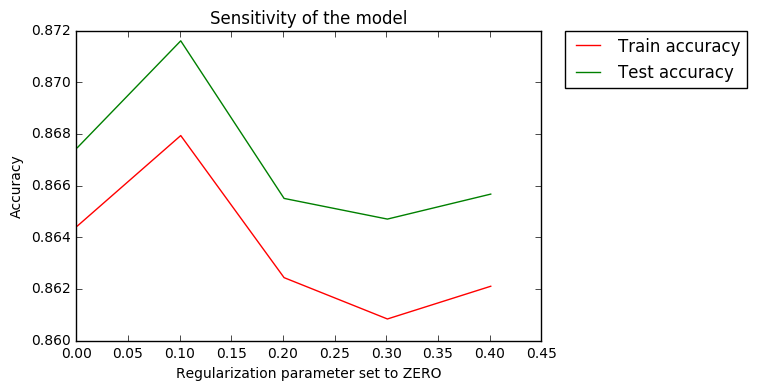

In [89]:
j = 0
train_acc = []
test_acc = []
x_axis = []
for i in range(1, 501, 100):
    W1, b1, W2, b2, loss = my_own_batch_sgd_ffn_leaky(X_train,y_train,0,0.01,50)
    # Performance check
    training_precision= get_train_accuracy_ffn_leaky(X_train,y_train,W1,b1,W2,b2)
    test_precision= get_test_accuracy_ffn_leaky(X_test,y_test,W1,b1,W2,b2)
    
    x_axis.append(i/1000)
    train_acc.append(training_precision)
    test_acc.append(test_precision)

plt.plot(x_axis,train_acc,'r',label = "Train accuracy") 
plt.plot(x_axis,test_acc,'g',label = "Test accuracy")
plt.xlabel("Regularization parameter set to ZERO")
plt.ylabel("Accuracy")
plt.title("Sensitivity of the model")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.text(100, max(train_acc[2])-max(train_acc[2]/10), 'Test accuracy' ,color = 'green')
#plt.text(100, max(train_acc[2])-max(train_acc[2]/8), 'Train accuracy' ,color = 'red')
plt.show()

(48000, 784) (48000,)
### Entering batch execution
### Exiting batch execution  |  Loss = 2.12859238983
Accuracy Train :  0.91475
Accuracy Train :  0.917333333333
(30000, 784) (30000,)
### Entering batch execution
### Exiting batch execution  |  Loss = 2.13219743718
Accuracy Train :  0.915166666667
Accuracy Train :  0.912266666667


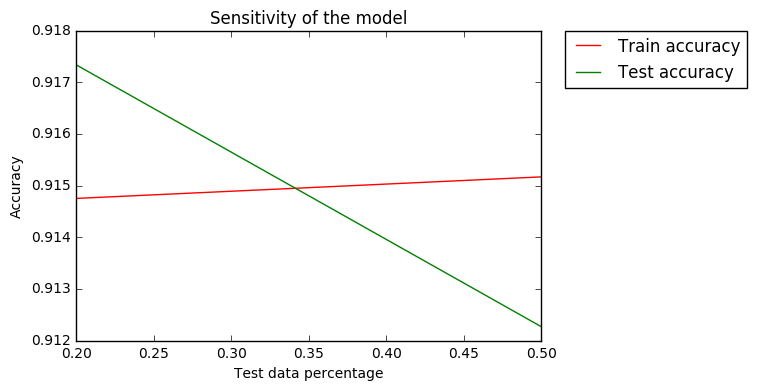

In [70]:
# 6.1.4.7 What is the sensitivity of the model's performance with respect to a different test-train split (50%:50%).
j = 0
train_acc = []
test_acc = []
x_axis = []
for i in range(20, 51, 30):
    X_train, X_test, y_train, y_test = split_data(X,y,i/100)
    
    W1, b1, W2, b2, loss = my_own_batch_sgd_ffn_leaky(X_train,y_train,0.01,0.1,50)
    #W,b,loss = linear_classifier(X_train,y_train,0.002,1.7,1000)
    # Performance check
    training_precision= get_train_accuracy_ffn_leaky(X_train,y_train,W1,b1,W2,b2)
    test_precision= get_test_accuracy_ffn_leaky(X_test,y_test,W1,b1,W2,b2)
    
    #print("# of Iterations = ",i," | Accuracy train = ",training_precision, " | Accuracy test = ",test_precision)
    x_axis.append(i/100)
    train_acc.append(training_precision)
    test_acc.append(test_precision)

plt.plot(x_axis,train_acc,'r',label = "Train accuracy") 
plt.plot(x_axis,test_acc,'g',label = "Test accuracy")
plt.xlabel("Test data percentage")
plt.ylabel("Accuracy")
plt.title("Sensitivity of the model")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.text(100, max(train_acc[2])-max(train_acc[2]/10), 'Test accuracy' ,color = 'green')
#plt.text(100, max(train_acc[2])-max(train_acc[2]/8), 'Train accuracy' ,color = 'red')
plt.show()

## *Maxout non-linearity f(x;W1; b1;W2; b2;W3; b3) = W3 max(W2x +b2;W1x + b1) + b3*

In [74]:
def reg_log_loss_layer_maxout(x_train,y_train,W,b,W2,b2,W3,b3,reg,step_size,iterations):
    
    num_examples = x_train.shape[0]
    
    total_loss = np.zeros(iterations)
    for i in range(0, iterations):
    
        hidden_layer = np.dot(x_train, W) + b # note, ReLU activation
        hidden_layer1 = np.dot(x_train, W2) + b2
        scores = np.dot(np.maximum(hidden_layer, hidden_layer1), W3) + b3
        scores = scores/scores.max()
        #print(scores[0,0:5])
        # compute the class probabilities
        exp_scores = np.exp(scores)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)# [N x K]
        #axis = 1 means row wise addition
    
        corect_logprobs = -np.log(probs[range(num_examples),y_train])
   
        data_loss = np.sum(corect_logprobs)/num_examples
        #L2_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2) + 0.5*reg*np.sum(W3*W3)
        log_L2_loss = data_loss #+ L2_loss
        #log_L1_loss = data_loss + L1_loss
        #L1_loss = 0.5*reg*np.sum(np.absolute(W)) + 0.5*reg*np.sum(np.absolute(W2)) + 0.5*reg*np.sum(np.absolute(W3))
        total_loss[i]=log_L2_loss 
        #if i % 10 == 0:
            #print("iteration: ", i, " loss = ",log_L2_loss)
    # compute the gradient on scores
        dscores = probs
        dscores[range(num_examples),y_train] -= 1
        dscores /= num_examples
  
    # backpropate the gradient to the parameters (W,b)
        dW3 = np.dot(np.maximum(hidden_layer.T, hidden_layer1.T), dscores)
        db3 = np.sum(dscores, axis=0, keepdims=True) 
        
    # next backprop into hidden layer
        dhidden = np.dot(dscores, W3.T)
        dhidden1 = np.dot(dscores, W3.T)
    # backprop the ReLU non-linearity
        dhidden[hidden_layer1 < hidden_layer] = 0*dhidden[np.where(hidden_layer1 < hidden_layer)] #backpropogate the relu non-linearity or not
        dhidden1[hidden_layer1 > hidden_layer] = 0*dhidden[np.where(hidden_layer1 > hidden_layer)]
    # backpropate the gradient to the parameters (W,b)
        dW2 = np.dot(x_train.T, dhidden)
        db2 = np.sum(dhidden, axis=0, keepdims=True)
        
    # next backprop into hidden layer
        #dhidden1 = np.dot(dscores, x_train.T)
    # backprop the ReLU non-linearity
        #dhidden1[hidden_layer <= 0] = 0
        #dhidden = np.maximum(dhidden,dhidden1)
        
    # finally into W,b
        dW = np.dot(x_train.T, dhidden1)
        db = np.sum(dhidden1, axis=0, keepdims=True)
  
  
      # add regularization gradient contribution
        dW3 += reg * W3
        dW2 += reg * W2
        dW  += reg * W
  
     # perform a parameter update
        W += -step_size * dW
        b += -step_size * db
        W2 += -step_size * dW2
        b2 += -step_size * db2
        W3 += -step_size * dW3
        b3 += -step_size * db3
    return W,b,W2,b2,W3,b3,log_L2_loss;

In [75]:
def my_own_batch_sgd_ffn_maxout(X_train,y_train,reg,learning_rate,num_iter):
    hid_lyr_neurons = 32
    D = X_train.shape[1]
    k = int(max(y_train)+ 1)
    W = 0.01*np.random.randn(D,hid_lyr_neurons)   
    b = np.zeros((1,hid_lyr_neurons))
    W2 = 0.01*np.random.randn(D,hid_lyr_neurons)   
    b2 = np.zeros((1,hid_lyr_neurons))
    W3 = 0.01 * np.random.randn(hid_lyr_neurons,k)
    b3 = np.zeros((1,k))
    batch_size = 48
    print("### Entering batch execution")
    for i in range(0,batch_size):
        #print("batch: ",i)
        start = int((X_train.shape[0]/48)*i)
        end = int((X_train.shape[0]/48)*(i+1))
        W,b,W2,b2,W3,b3,total_loss = reg_log_loss_layer_maxout(X_train[start:end,],y_train[start:end,],W,b,W2,b2,W3,b3,reg,learning_rate,num_iter)
    print("### Exiting batch execution  |  Loss =", total_loss)
    return W,b,W2,b2,W3,b3,total_loss;

In [13]:
test_proportion = 0.2
X_train, X_Val, y_train, y_Val = split_data(X,y,test_proportion)

W, b, W2, b2, W3, b3, loss = my_own_batch_sgd_ffn_maxout(X_train,y_train,0.01,0.01,50)

get_train_accuracy_maxout(X_train,y_train,W, b, W2, b2, W3, b3)
get_test_accuracy_maxout(X_Val,y_Val,W, b, W2, b2, W3, b3)


(48000, 784) (48000,)
### Entering batch execution
iteration:  0  loss =  2.35325276154
iteration:  10  loss =  2.31380925774
iteration:  20  loss =  2.26650705197
iteration:  30  loss =  2.21559562718
iteration:  40  loss =  2.16811588636
iteration:  0  loss =  2.14645814336
iteration:  10  loss =  2.11349838452
iteration:  20  loss =  2.09771115661
iteration:  30  loss =  2.09353235645
iteration:  40  loss =  2.09108127708
iteration:  0  loss =  2.11541893425
iteration:  10  loss =  2.09627664164
iteration:  20  loss =  2.08614391377
iteration:  30  loss =  2.08123884424
iteration:  40  loss =  2.07903950765
iteration:  0  loss =  2.02717843168
iteration:  10  loss =  2.0163159598
iteration:  20  loss =  2.01060556423
iteration:  30  loss =  2.00863641506
iteration:  40  loss =  2.01030153944
iteration:  0  loss =  2.0388741591
iteration:  10  loss =  2.04482462009
iteration:  20  loss =  2.04849966998
iteration:  30  loss =  2.05141692398
iteration:  40  loss =  2.05399288644
iterat

0.32541666666666669

In [76]:
from sklearn import cross_validation
cv = cross_validation.KFold(len(X_train), n_folds=5, shuffle=True) # 43200 & 4800 each
i = 0
for train_indices, test_indices in cv:
    i = i + 1  
    W, b, W2, b2, W3, b3, loss = my_own_batch_sgd_ffn_maxout(X_train[train_indices],y_train[train_indices],0.01,0.1,50)
    y_hat_test = np.argmax(np.dot(np.maximum(np.dot(X_train[test_indices], W) + b, np.dot(X_train[test_indices], W2) + b2), W3) + b3, axis = 1)
    test_precision = np.mean(y_hat_test == y_train[test_indices])
    print("#### CV ", i, "Test accuracy : ", test_precision)
    

### Entering batch execution
### Exiting batch execution  |  Loss = 2.21092290711
#### CV  1 Test accuracy :  0.2495
### Entering batch execution
### Exiting batch execution  |  Loss = 2.14696791623
#### CV  2 Test accuracy :  0.292166666667
### Entering batch execution
### Exiting batch execution  |  Loss = 2.17921362064
#### CV  3 Test accuracy :  0.282833333333
### Entering batch execution
### Exiting batch execution  |  Loss = 2.21063685033
#### CV  4 Test accuracy :  0.249166666667
### Entering batch execution
### Exiting batch execution  |  Loss = 2.18912404301
#### CV  5 Test accuracy :  0.2645


In [95]:
# What is the sensitivity of the model's performance to different learning rates
# the number of gradient descent iterations. Describe via suitable plots.

test_proportion = 0.2
X_train, X_test, y_train, y_test = split_data(X,y,test_proportion)
j = 0
train_acc = []
test_acc = []
x_axis = []
for i in range(1, 5):
    W, b, W2, b2, W3, b3, loss = my_own_batch_sgd_ffn_maxout(X_train,y_train,0.01,0.1,i*50)
    # Performance check
    training_precision = get_train_accuracy_maxout(X_train,y_train,W, b, W2, b2, W3, b3)
    test_precision = get_test_accuracy_maxout(X_test,y_test,W, b, W2, b2, W3, b3)
    
    x_axis.append(i*50)
    train_acc.append(training_precision)
    test_acc.append(test_precision)

(48000, 784) (48000,)
### Entering batch execution
### Exiting batch execution  |  Loss = 2.20607208721
Accuracy Train :  0.271833333333
Accuracy Test  :  0.275166666667
### Entering batch execution
### Exiting batch execution  |  Loss = 2.20426498982
Accuracy Train :  0.248791666667
Accuracy Test  :  0.255083333333
### Entering batch execution
### Exiting batch execution  |  Loss = 2.2057755307
Accuracy Train :  0.243729166667
Accuracy Test  :  0.249333333333
### Entering batch execution
### Exiting batch execution  |  Loss = 2.20191757191
Accuracy Train :  0.0982916666667
Accuracy Test  :  0.100416666667


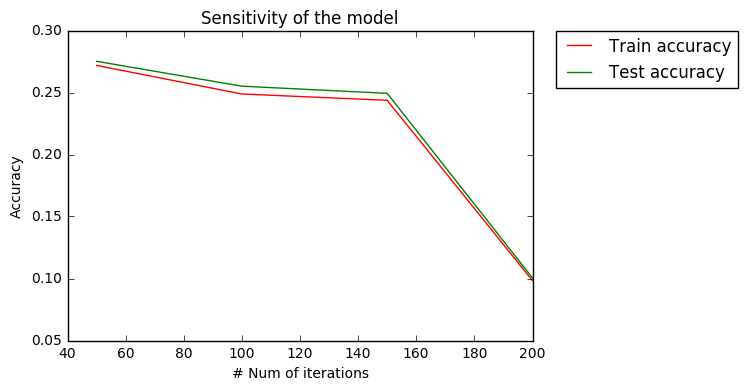

In [96]:
plt.plot(x_axis,train_acc,'r',label = "Train accuracy") 
plt.plot(x_axis,test_acc,'g',label = "Test accuracy")
plt.xlabel("# Num of iterations")
plt.ylabel("Accuracy")
plt.title("Sensitivity of the model")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.text(100, max(train_acc[2])-max(train_acc[2]/10), 'Test accuracy' ,color = 'green')
#plt.text(100, max(train_acc[2])-max(train_acc[2]/8), 'Train accuracy' ,color = 'red')
plt.show()

In [97]:
j = 0
train_acc = []
test_acc = []
x_axis = []
for i in range(1, 501, 100):
    W, b, W2, b2, W3, b3, loss = my_own_batch_sgd_ffn_maxout(X_train,y_train,0.01,i/1000,50)
    # Performance check
    training_precision = get_train_accuracy_maxout(X_train,y_train,W, b, W2, b2, W3, b3)
    test_precision = get_test_accuracy_maxout(X_test,y_test,W, b, W2, b2, W3, b3)
    
    x_axis.append(i/1000)
    train_acc.append(training_precision)
    test_acc.append(test_precision)

### Entering batch execution
### Exiting batch execution  |  Loss = nan
Accuracy Train :  0.6498125
Accuracy Test  :  0.651833333333
### Entering batch execution
### Exiting batch execution  |  Loss = 2.08892828625
Accuracy Train :  0.2715625
Accuracy Test  :  0.274916666667
### Entering batch execution
### Exiting batch execution  |  Loss = 2.20434705738
Accuracy Train :  0.249666666667
Accuracy Test  :  0.255583333333
### Entering batch execution
### Exiting batch execution  |  Loss = 2.20607803164
Accuracy Train :  0.244229166667
Accuracy Test  :  0.250416666667
### Entering batch execution
### Exiting batch execution  |  Loss = 2.20290981827
Accuracy Train :  0.0982916666667
Accuracy Test  :  0.100416666667


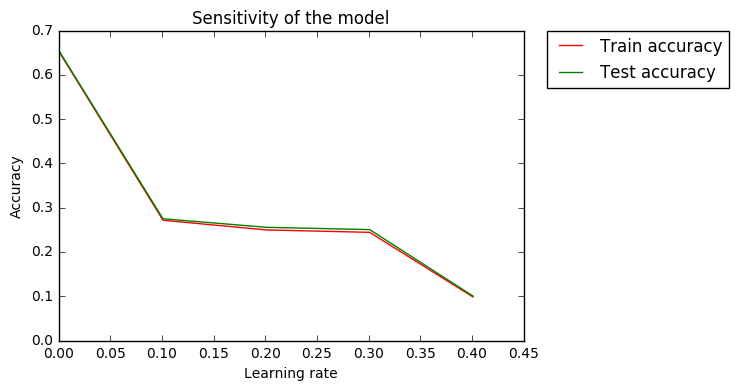

In [ ]:
plt.plot(x_axis,train_acc,'r',label = "Train accuracy") 
plt.plot(x_axis,test_acc,'g',label = "Test accuracy")
plt.xlabel("Learning rate")
plt.ylabel("Accuracy")
plt.title("Sensitivity of the model")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.text(100, max(train_acc[2])-max(train_acc[2]/10), 'Test accuracy' ,color = 'green')
#plt.text(100, max(train_acc[2])-max(train_acc[2]/8), 'Train accuracy' ,color = 'red')
plt.show()

In [ ]:
j = 0
train_acc = []
test_acc = []
x_axis = []
for i in range(1, 500, 100):
    W, b, W2, b2, W3, b3, loss = my_own_batch_sgd_ffn_maxout(X_train,y_train,i/1000,0.01,50)
    # Performance check
    training_precision = get_train_accuracy_maxout(X_train,y_train,W, b, W2, b2, W3, b3)
    test_precision = get_test_accuracy_maxout(X_test,y_test,W, b, W2, b2, W3, b3)
    
    x_axis.append(i/1000)
    train_acc.append(training_precision)
    test_acc.append(test_precision)

### Entering batch execution


In [ ]:
plt.plot(x_axis,train_acc,'r',label = "Train accuracy") 
plt.plot(x_axis,test_acc,'g',label = "Test accuracy")
plt.xlabel("Regularization parameter")
plt.ylabel("Accuracy")
plt.title("Sensitivity of the model")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.text(100, max(train_acc[2])-max(train_acc[2]/10), 'Test accuracy' ,color = 'green')
#plt.text(100, max(train_acc[2])-max(train_acc[2]/8), 'Train accuracy' ,color = 'red')
plt.show()

In [ ]:
j = 0
train_acc = []
test_acc = []
x_axis = []
for i in range(1, 500, 100):
    W, b, W2, b2, W3, b3, loss = my_own_batch_sgd_ffn_maxout(X_train,y_train,0,0.01,50)
    # Performance check
    training_precision = get_train_accuracy_maxout(X_train,y_train,W, b, W2, b2, W3, b3)
    test_precision = get_test_accuracy_maxout(X_test,y_test,W, b, W2, b2, W3, b3)
    
    x_axis.append(i/1000)
    train_acc.append(training_precision)
    test_acc.append(test_precision)
    
plt.plot(x_axis,train_acc,'r',label = "Train accuracy") 
plt.plot(x_axis,test_acc,'g',label = "Test accuracy")
plt.xlabel("Regularization parameter")
plt.ylabel("Accuracy")
plt.title("Sensitivity of the model")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.text(100, max(train_acc[2])-max(train_acc[2]/10), 'Test accuracy' ,color = 'green')
#plt.text(100, max(train_acc[2])-max(train_acc[2]/8), 'Train accuracy' ,color = 'red')
plt.show()

(48000, 784) (48000,)
### Entering batch execution
### Exiting batch execution  |  Loss = 2.20427370216
Accuracy Train :  0.2718125
Accuracy Test  :  0.275166666667
(30000, 784) (30000,)
### Entering batch execution
### Exiting batch execution  |  Loss = 2.19639270314
Accuracy Train :  0.262633333333
Accuracy Test  :  0.262833333333


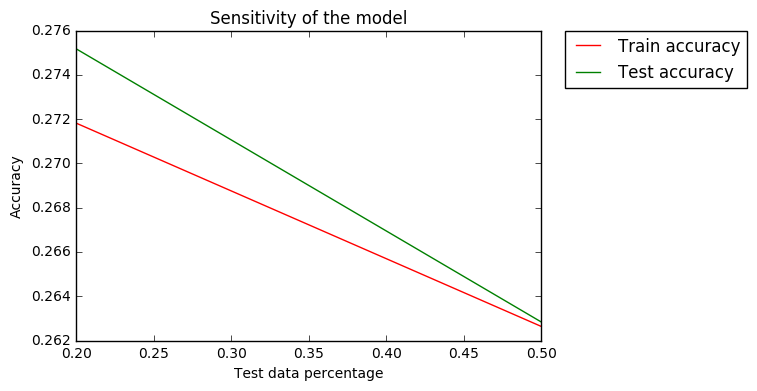

In [81]:
# 6.1.4.7 What is the sensitivity of the model's performance with respect to a different test-train split (50%:50%).
j = 0
train_acc = []
test_acc = []
x_axis = []
for i in range(20, 51, 30):
    X_train, X_test, y_train, y_test = split_data(X,y,i/100)
    
    W, b, W2, b2, W3, b3, loss = my_own_batch_sgd_ffn_maxout(X_train,y_train,0.01,0.1,50)
    #W,b,loss = linear_classifier(X_train,y_train,0.002,1.7,1000)
    # Performance check
    training_precision = get_train_accuracy_maxout(X_train,y_train,W, b, W2, b2, W3, b3)
    test_precision = get_test_accuracy_maxout(X_test,y_test,W, b, W2, b2, W3, b3)
    
    #print("# of Iterations = ",i," | Accuracy train = ",training_precision, " | Accuracy test = ",test_precision)
    x_axis.append(i/100)
    train_acc.append(training_precision)
    test_acc.append(test_precision)

plt.plot(x_axis,train_acc,'r',label = "Train accuracy") 
plt.plot(x_axis,test_acc,'g',label = "Test accuracy")
plt.xlabel("Test data percentage")
plt.ylabel("Accuracy")
plt.title("Sensitivity of the model")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.text(100, max(train_acc[2])-max(train_acc[2]/10), 'Test accuracy' ,color = 'green')
#plt.text(100, max(train_acc[2])-max(train_acc[2]/8), 'Train accuracy' ,color = 'red')
plt.show()

## *Impact of increasing hidden unit from a small value 32 to 128 ?*

In [90]:
def my_own_batch_sgd_ffn(X_train,y_train,reg,learning_rate,num_iter):
    hid_lyr_neurons = 128
    D = X_train.shape[1]
    k = int(max(y_train)+ 1)
    W1 = 0.01*np.random.randn(D,hid_lyr_neurons)   
    b1 = np.zeros((1,hid_lyr_neurons))
    W2 = 0.01*np.random.randn(hid_lyr_neurons,k)   
    b2 = np.zeros((1,k))
    batch_size = 48
    print("### Entering batch execution")
    for i in range(0,batch_size):
        #print("batch: ",i)
        start = int((X_train.shape[0]/48)*i)
        end = int((X_train.shape[0]/48)*(i+1))
        W1, b1, W2, b2, loss = two_layer_ffnn(X_train[start:end,],y_train[start:end,],W1,b1,W2,b2,reg,learning_rate,num_iter)
    print("### Exiting batch execution  |  Loss =", loss)
    return W1, b1, W2, b2, loss;

test_proportion = 0.2
X_train, X_Val, y_train, y_Val = split_data(X,y,test_proportion)

W1, b1, W2, b2, loss = my_own_batch_sgd_ffn(X_train,y_train,0.01,0.2,50)

get_train_accuracy_ffn(X_train,y_train,W1, b1, W2, b2)
get_test_accuracy_ffn(X_Val,y_Val, W1, b1, W2, b2)

(48000, 784) (48000,)
### Entering batch execution
### Exiting batch execution  |  Loss = 2.13663544969
Accuracy Train :  0.9251875
Accuracy Test  :  0.92775


0.92774999999999996

In [91]:
def my_own_batch_sgd_ffn_leaky(X_train,y_train,reg,learning_rate,num_iter):
    hid_lyr_neurons = 128
    D = X_train.shape[1]
    k = int(max(y_train)+ 1)
    W1 = 0.01*np.random.randn(D,hid_lyr_neurons)   
    b1 = np.zeros((1,hid_lyr_neurons))
    W2 = 0.01*np.random.randn(hid_lyr_neurons,k)   
    b2 = np.zeros((1,k))
    batch_size = 48
    print("### Entering batch execution")
    for i in range(0,batch_size):
        #print("batch: ",i)
        start = int((X_train.shape[0]/48)*i)
        end = int((X_train.shape[0]/48)*(i+1))
        W1, b1, W2, b2, loss = two_layer_ffnn_leaky_relu(X_train[start:end,],y_train[start:end,],W1,b1,W2,b2,reg,learning_rate,num_iter)
    print("### Exiting batch execution  |  Loss =", loss)
    return W1, b1, W2, b2, loss;

test_proportion = 0.2
X_train, X_Val, y_train, y_Val = split_data(X,y,test_proportion)

W1, b1, W2, b2, loss = my_own_batch_sgd_ffn_leaky(X_train,y_train,0.01,0.2,50)

get_train_accuracy_ffn_leaky(X_train,y_train,W1, b1, W2, b2)
get_test_accuracy_ffn_leaky(X_Val,y_Val, W1, b1, W2, b2)

(48000, 784) (48000,)
### Entering batch execution
### Exiting batch execution  |  Loss = 2.13204647958
Accuracy Train :  0.923479166667
Accuracy Train :  0.927333333333


0.92733333333333334

In [92]:
def my_own_batch_sgd_ffn_maxout(X_train,y_train,reg,learning_rate,num_iter):
    hid_lyr_neurons = 128  # Changed number of hidden units
    D = X_train.shape[1]
    k = int(max(y_train)+ 1)
    W = 0.01*np.random.randn(D,hid_lyr_neurons)   
    b = np.zeros((1,hid_lyr_neurons))
    W2 = 0.01*np.random.randn(D,hid_lyr_neurons)   
    b2 = np.zeros((1,hid_lyr_neurons))
    W3 = 0.01 * np.random.randn(hid_lyr_neurons,k)
    b3 = np.zeros((1,k))
    print("### Entering batch execution")
    for i in range(0,batch_size):
        #print("batch: ",i)
        start = int((X_train.shape[0]/48)*i)
        end = int((X_train.shape[0]/48)*(i+1))
        W,b,W2,b2,W3,b3,total_loss = reg_log_loss_layer_maxout(X_train[start:end,],y_train[start:end,],W,b,W2,b2,W3,b3,reg,learning_rate,num_iter)
    print("### Exiting batch execution  |  Loss =", loss)
    return W,b,W2,b2,W3,b3,total_loss;

test_proportion = 0.2
X_train, X_Val, y_train, y_Val = split_data(X,y,test_proportion)

W, b, W2, b2, W3, b3, loss = my_own_batch_sgd_ffn_maxout(X_train,y_train,0.01,0.2,50)

get_train_accuracy_maxout(X_train,y_train,W, b, W2, b2, W3, b3)
get_test_accuracy_maxout(X_Val,y_Val,W, b, W2, b2, W3, b3)

(48000, 784) (48000,)
### Entering batch execution
### Exiting batch execution  |  Loss = 2.13204647958
Accuracy Train :  0.249729166667
Accuracy Test  :  0.255833333333


0.25583333333333336

In [24]:
# Accuracy calculation 

def get_train_accuracy(X_train,y_train,W,b):
    y_hat_train = np.argmax((np.dot(X_train, W)+b), axis = 1)
    training_precision = np.mean(y_hat_train == y_train)
    print("Accuracy Train : ",training_precision)

def get_test_accuracy(X_test,y_test,W,b):
    y_hat_test = np.argmax((np.dot(X_test, W)+b), axis = 1)
    test_precision = np.mean(y_hat_test == y_test)
    print("Accuracy Test  : ",test_precision)
    
def get_train_accuracy_ffn(X_train,y_train,W1,b1,W2,b2):
    y_hat_train = np.argmax(np.dot(np.maximum(0,np.dot(X_train,W1)+ b1),W2)+ b2,axis = 1)
    training_precision = np.mean(y_hat_train == y_train)
    print("Accuracy Train : ",training_precision)
    return training_precision;

def get_test_accuracy_ffn(X_test,y_test,W1,b1,W2,b2):
    y_hat_test = np.argmax(np.dot(np.maximum(0,np.dot(X_test,W1)+ b1),W2)+ b2, axis = 1)
    test_precision = np.mean(y_hat_test == y_test)
    print("Accuracy Test  : ",test_precision)
    return test_precision;

def get_test_accuracy_ffn_leaky(X_test,y_test,W1,b1,W2,b2):
    hidden_layer = np.dot(X_test,W1)+b1
    hidden_layer[hidden_layer<0] = 0.01*hidden_layer[np.where(hidden_layer<0)]
    y_hat_test = np.argmax(np.dot(hidden_layer, W2) + b2, axis =1)
    test_precision = np.mean(y_hat_test == y_test)
    print("Accuracy Train : ",test_precision)
    return test_precision;
    
def get_train_accuracy_ffn_leaky(X_train,y_train,W1,b1,W2,b2):
    hidden_layer = np.dot(X_train,W1)+b1
    hidden_layer[hidden_layer<0] = 0.01*hidden_layer[np.where(hidden_layer<0)]
    y_hat_train = np.argmax(np.dot(hidden_layer, W2) + b2, axis = 1)
    training_precision = np.mean(y_hat_train == y_train)
    print("Accuracy Train : ",training_precision)
    return training_precision;
    
def get_train_accuracy_maxout(X_train,y_train,W, b, W2, b2, W3, b3):
    y_hat_train = np.argmax(np.dot(np.maximum(np.dot(X_train, W) + b, np.dot(X_train, W2) + b2), W3) + b3, axis = 1)
    training_precision = np.mean(y_hat_train == y_train)
    print("Accuracy Train : ",training_precision)
    return training_precision;

def get_test_accuracy_maxout(X_test,y_test,W, b, W2, b2, W3, b3):
    y_hat_test = np.argmax(np.dot(np.maximum(np.dot(X_test, W) + b, np.dot(X_test, W2) + b2), W3) + b3, axis = 1)
    test_precision = np.mean(y_hat_test == y_test)
    print("Accuracy Test  : ",test_precision)
    return test_precision;